In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

La funzione detect_anomalies Restituisce le entry del dataframe che hanno almeno <seconds_threshold> secondi di valori uguali. 

In [51]:
def detect_anomalies(accelerometer_df: pd.DataFrame, hand_type: str, seconds_threshold: int = 5) -> pd.DataFrame:
    """
    Restituisce le entry del dataframe che hanno almeno <seconds_threshold> secondi di valori uguali
    hand_type: D -> Mano dominante, ND -> Mano non dominante
    """
    if hand_type != "D" and hand_type != "ND":
        raise ValueError("hand_type deve essere 'D' o 'ND'")
    
    campionamenti_per_secondo = 8 # l'accelerometro esegue 8 campionamenti al secondo
    seconds_threshold = seconds_threshold*campionamenti_per_secondo

    df_diff = accelerometer_df[f'x_{hand_type}', f'y_{hand_type}', f'z_{hand_type}'].diff()
    anomalies = df_diff.rolling(window=seconds_threshold).apply(lambda x: all(num == 0 for num in x)) # Recupera le righe che hanno almeno 5 secondi di valori uguali
    anomaly_rows = accelerometer_df[anomalies.any(axis=1)]
    return anomaly_rows

In [29]:
df = pd.read_csv("C:/Users/peppe\Desktop/raw_data/1_week_RAW.csv")

In [57]:
df1 = pd.read_csv("C:/Users/peppe\Desktop/raw_data/1_week_RAW.csv", nrows=691200, skiprows=lambda x: x in [1, 691200])

In [71]:
df2 = pd.read_csv("C:/Users/peppe\Desktop/raw_data/1_week_RAW.csv", nrows=691200, skiprows=lambda x: x in [1, 691200*2])

In [30]:
df.describe()

,x_D,y_D,z_D,x_ND,y_ND,z_ND
count,4.147200e+07,4.147200e+07,4.147200e+07,4.147200e+07,4.147200e+07,4.147200e+07
mean,-2.710964e-01,-1.302801e-01,3.239005e-02,1.495236e-01,-8.413153e-02,-2.752513e-02
std,5.255687e-01,6.008187e-01,5.474589e-01,5.668961e-01,5.392117e-01,6.110965e-01
min,-8.000000e+00,-8.000000e+00,-8.000000e+00,-6.348000e+00,-6.328000e+00,-6.367000e+00
25%,-7.580000e-01,-8.710000e-01,-3.670000e-01,-3.480000e-01,-4.960000e-01,-5.550000e-01
50%,-2.420000e-01,8.000000e-03,2.300000e-02,1.760000e-01,-4.000000e-03,-3.100000e-02
75%,2.730000e-01,3.160000e-01,4.770000e-01,6.760000e-01,1.760000e-01,5.430000e-01
max,7.492000e+00,6.445000e+00,7.996000e+00,7.410000e+00,4.520000e+00,6.500000e+00


In [58]:
df1.describe()

,x_D,y_D,z_D,x_ND,y_ND,z_ND
count,691200.000000,691200.000000,691200.000000,691200.000000,691200.000000,691200.000000
mean,-0.949552,0.022535,0.272448,-0.957798,-0.003138,0.276052
std,0.002691,0.003356,0.003004,0.003094,0.002522,0.003019
min,-0.969000,0.012000,0.258000,-0.969000,-0.012000,0.262000
25%,-0.949000,0.020000,0.270000,-0.961000,-0.004000,0.273000
50%,-0.949000,0.023000,0.273000,-0.957000,-0.004000,0.277000
75%,-0.949000,0.023000,0.273000,-0.957000,-0.004000,0.277000
max,-0.938000,0.043000,0.285000,-0.945000,0.016000,0.289000


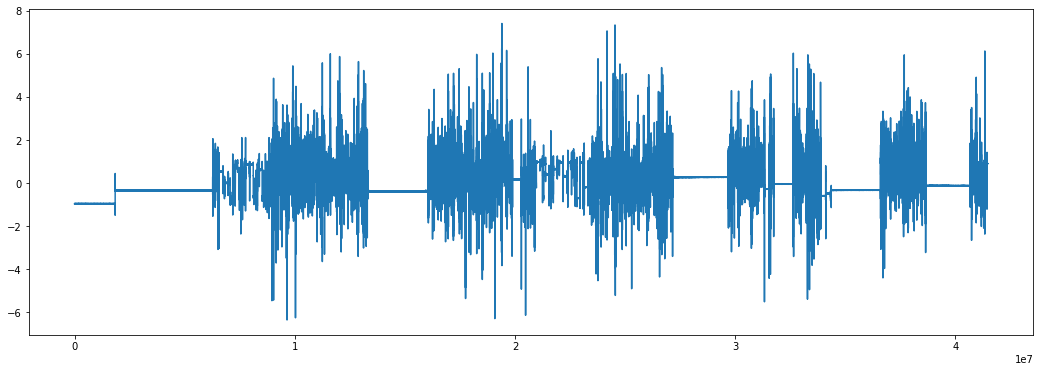

In [31]:
plt.figure(figsize=(18,6))
plt.plot(df['x_ND'])

plt.show()

In [55]:
def detect_anomalies(accelerometer_df: pd.DataFrame, hand_type: str, seconds_threshold: int = 28800) -> pd.DataFrame:
    """
    Restituisce le entry del dataframe che hanno almeno <seconds_threshold> secondi di valori uguali
    hand_type: D -> Mano dominante, ND -> Mano non dominante
    """
    if hand_type != "D" and hand_type != "ND":
        raise ValueError("hand_type deve essere 'D' o 'ND'")
    
    df_diff = accelerometer_df[[f'x_{hand_type}', f'y_{hand_type}', f'z_{hand_type}']].diff()
    anomalies = df_diff.rolling(window=seconds_threshold).apply(lambda x: all(abs(num) <= 0.05 for num in x)) # Recupera le righe che hanno almeno 5 secondi di valori uguali
    anomaly_rows = accelerometer_df[anomalies.any(axis=1)]
    return anomaly_rows

In [74]:
indexes = []
for i in range(0,24):
    if i != 0:
        if (df2["x_D"].iloc[691200*i:691200*(i+1)].std()<0.01) and (df2["y_D"].iloc[691200*i:691200*(i+1)].std()<0.01) and (df2["z_D"].iloc[691200*i:691200*(i+1)].std()<0.01) and (df2["x_ND"].iloc[691200*i:691200*(i+1)].std()<0.01) and (df2["y_ND"].iloc[691200*i:691200*(i+1)].std()<0.01) and (df2["z_ND"].iloc[691200*i:691200*(i+1)].std()<0.01):
            indexes.append(i)
    else:
        if (df2["x_D"].iloc[i:691200].std()<0.01) and (df2["y_D"].iloc[i:691200].std()<0.01) and (df2["z_D"].iloc[i:691200].std()<0.01) and (df2["x_ND"].iloc[i:691200].std()<0.01) and (df2["y_ND"].iloc[i:691200].std()<0.01) and (df2["z_ND"].iloc[i:691200].std()<0.01):
            indexes.append(i)


In [83]:
indexes2 = []
for i in range(0,24):
    if i != 0:
        if (df1["x_D"].iloc[691200*i:691200*(i+1)].std()<0.05) and (df1["y_D"].iloc[691200*i:691200*(i+1)].std()<0.05) and (df1["z_D"].iloc[691200*i:691200*(i+1)].std()<0.05) and (df1["x_ND"].iloc[691200*i:691200*(i+1)].std()<0.05) and (df1["y_ND"].iloc[691200*i:691200*(i+1)].std()<0.05) and (df1["z_ND"].iloc[691200*i:691200*(i+1)].std()<0.05):
            indexes2.append(i)
    else:
        if (df1["x_D"].iloc[i:691200].std()<0.05) and (df1["y_D"].iloc[i:691200].std()<0.05) and (df1["z_D"].iloc[i:691200].std()<0.05) and (df1["x_ND"].iloc[i:691200].std()<0.05) and (df1["y_ND"].iloc[i:691200].std()<0.05) and (df1["z_ND"].iloc[i:691200].std()<0.01):
            indexes2.append(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [81]:
indexes2

[0]

In [59]:
detect_anomalies(df1, "ND", 28800)

KeyboardInterrupt: 

In [33]:
magnitude_D = np.sqrt(np.square(df['x_D']) + np.square(df['y_D']) + np.square(df['z_D'])) #mano dominante
magnitude_ND = np.sqrt(np.square(df['x_ND']) + np.square(df['y_ND']) + np.square(df['z_ND'])) #mano non dominante

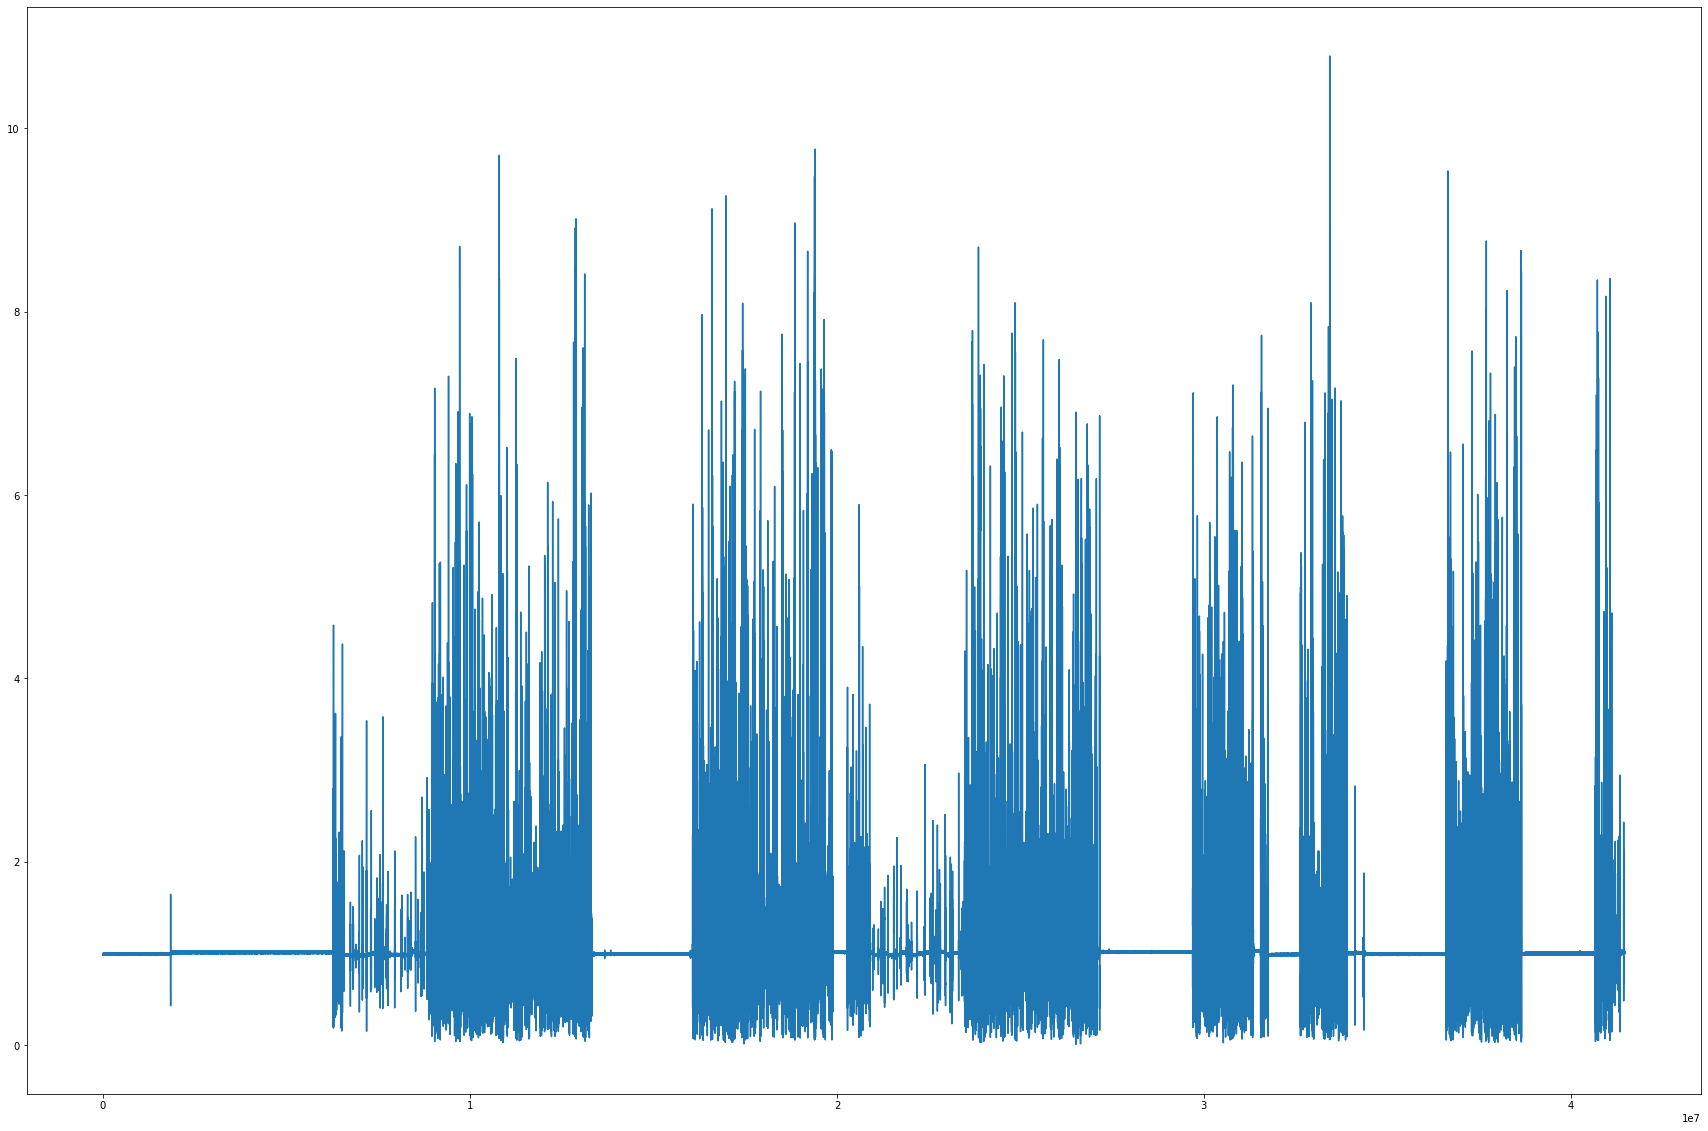

In [34]:
plt.figure(figsize=(30,20))
plt.plot(magnitude_D)

plt.show()